# PREPROCESSING

## 1. Import Libraries

**Data Analysis and Visualization Setup with Python**

**Description**

This repository contains a Python script for setting up an environment for data analysis and visualization. It imports necessary libraries such as NumPy, Pandas, Matplotlib, and Seaborn. Additionally, it sets up configurations to ignore warnings during runtime.

**Key Components**

- **Libraries Used**:
  - `NumPy`: For numerical computing with arrays and matrices.
  - `Pandas`: For data manipulation and analysis.
  - `Matplotlib`: For creating static, animated, and interactive visualizations.
  - `Seaborn`: For statistical data visualization.

- **Ignore Warnings**:
  - Configuration to suppress warnings during runtime.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import random
import os
import seaborn as sns

# import tensorflow as tf
# from tensorflow.keras import callbacks
# from tensorflow import keras
# from tensorflow.keras import layers
# from tensorflow.keras.models import Sequential

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## 2. Data Collection

### Surreal Symphonies - A Dataset of Diverse Art

https://www.kaggle.com/datasets/cyanex1702/surreal-symphonies-a-dataset-of-diverse-art/data

**Description** 

This dataset consists of a collection of 30 distinct artsy image folders, each showcasing its unique theme and style. The dataset contains a total of 7327 files with the following distribution based on file formats:

- **.jpg**: 6821 files
- **.png**: 304 files
- **.jpeg**: 157 files
- **Other formats(gif)**: 45 files

You can use this dataset for various purposes, including art analysis, style transfer, and other creative and machine learning projects.


In [7]:
dataset_dir = '..\Data\Datasets\Surreal Symphonies (A dataset of Diverse Artistic Visions)'
dataset_dir = pathlib.Path(dataset_dir)

In [8]:
for dirname, _, filenames in os.walk(dataset_dir):
    for filename in filenames:
        print(os.path.join(dirname, filename))

..\Data\Datasets\Surreal Symphonies (A dataset of Diverse Artistic Visions)\Abstract art\Abstract art\0e4pfg5n.jpg
..\Data\Datasets\Surreal Symphonies (A dataset of Diverse Artistic Visions)\Abstract art\Abstract art\0mrgszsi.jpg
..\Data\Datasets\Surreal Symphonies (A dataset of Diverse Artistic Visions)\Abstract art\Abstract art\0nv59gk5.jpg
..\Data\Datasets\Surreal Symphonies (A dataset of Diverse Artistic Visions)\Abstract art\Abstract art\0p5mr2u6.jpg
..\Data\Datasets\Surreal Symphonies (A dataset of Diverse Artistic Visions)\Abstract art\Abstract art\0tmfdsk7.jpg
..\Data\Datasets\Surreal Symphonies (A dataset of Diverse Artistic Visions)\Abstract art\Abstract art\104erwj8.jpg
..\Data\Datasets\Surreal Symphonies (A dataset of Diverse Artistic Visions)\Abstract art\Abstract art\10maslob.jpg
..\Data\Datasets\Surreal Symphonies (A dataset of Diverse Artistic Visions)\Abstract art\Abstract art\118oh5v1.jpg
..\Data\Datasets\Surreal Symphonies (A dataset of Diverse Artistic Visions)\Abst

## 3. Data Exploration

**Image File Count Script**

This script iterates through a dataset directory, counts the number of image files in each class subdirectory, and displays the results in a pandas DataFrame. It also calculates the total number of image files and the total number of classes.

In [9]:
# Dictionary to store the count of image files for each class
class_file_count = {}

# Variable to store the total number of image files
total_file_count = 0

# Iterate through the dataset directory to find all classes and count the number of image files
for main_dir in dataset_dir.iterdir():
    if main_dir.is_dir():
        for class_dir in main_dir.iterdir():
            if class_dir.is_dir():
                class_name = class_dir.name
                # Count the number of image files in this class subdirectory
                file_count = sum(1 for file in class_dir.glob(
                    '*') if file.suffix.lower() in ['.jpg', '.jpeg', '.png', '.jpe', '.gif'])
                class_file_count[class_name] = file_count
                total_file_count += file_count  # Add to the total number of files

# Number of classes
num_classes = len(class_file_count)

# Convert the dictionary to a pandas DataFrame
df = pd.DataFrame(list(class_file_count.items()),
                  columns=['Class Name', 'File Count'])

# Add a row for the total number of files
# df.loc[''] = ['Total', total_file_count]

# Display the DataFrame
print(df)

# Display total number of classes and files separately
print(f"\nTotal number of classes: {num_classes}")
print(f"Total number of files: {total_file_count}")

                          Class Name  File Count
0                       Abstract art         283
1   Abstract expressionism paintings         253
2                       Academic art         220
3                 Art deco paintings         260
4              Art Nouveau paintings         254
5                  Baroque paintings         240
6                 Constructivism art         239
7                   Contemporary art         287
8                         Cubism art         290
9                    Dadaism artwork         259
10                       Digital art         279
11           Expressionism paintings         287
12                 Fauvism paintings         282
13                        Gothic art         291
14             Impressionism artwork         262
15               Mannerism paintings         226
16                    Minimalism art         260
17                 Modernism artwork          21
18                         Naive art         253
19             Neo-e

**File Extension Count Script**

This script iterates through all files in a dataset directory, counts the number of files by their extension, and displays the results in a pandas DataFrame. It also calculates the total number of files.

In [10]:
# Dictionary to store the count of files by extension
total_files_by_extension = {}

# Iterate through all files in the dataset directory
for root, dirs, files in os.walk(dataset_dir):
    for file in files:
        # Get the full path of the file
        file_path = os.path.join(root, file)
        # Get the file name and extension
        file_name, file_extension = os.path.splitext(file_path)
        # Add the file count to the dictionary based on its extension
        total_files_by_extension[file_extension.lower()] = total_files_by_extension.get(
            file_extension.lower(), 0) + 1

# Convert the dictionary to a pandas DataFrame
df = pd.DataFrame(list(total_files_by_extension.items()),
                  columns=['Extension', 'File Count'])

# Calculate total number of files
total_files = df['File Count'].sum()

# Display the DataFrame
print(df)

# Display total number of files
print(f"\nTotal number of files: {total_files}")

  Extension  File Count
0      .jpg        6821
1     .jpeg         157
2      .jpe          12
3      .png         304
4      .gif          33

Total number of files: 7327


**Duplicate File Name Detection Script**

This script iterates through all files in a dataset directory, detects duplicate file names, and displays them. If no duplicates are found, it informs the user.

In [11]:
# List to store file names
all_file_names = []

# List to store duplicate file names
duplicate_file_names = []

# Iterate through all files in the dataset directory
for root, dirs, files in os.walk(dataset_dir):
    for file in files:
        # Get the full path of the file
        file_path = os.path.join(root, file)
        # Get the file name
        file_name = pathlib.Path(file_path).name
        # Check if the file name is already in the list
        if file_name in all_file_names:
            duplicate_file_names.append(file_name)
        else:
            all_file_names.append(file_name)

# Display duplicate file names
if duplicate_file_names:
    print("Duplicate File Names:")
    for name in duplicate_file_names:
        print(name)
else:
    print("No duplicate file names found.")

No duplicate file names found.


**Dataset File Organization Script**

This script organizes files from a dataset directory into a new directory structure. It creates the necessary subdirectories and copies files to their new locations while preserving the original directory hierarchy, excluding the top-level directory and the last directory segment.

In [12]:
# # Path ke direktori dataset
# inputs_dir = dataset_dir

# # Konversi ke objek Path
# inputs_dir = pathlib.Path(dataset_dir)

# # Direktori baru untuk menyimpan hasil modifikasi
# new_dataset_dir = '..\Data\Modified_Datasets'
# new_dataset_dir = pathlib.Path(new_dataset_dir)

# # Loop melalui semua file dalam direktori
# for dirname, _, filenames in os.walk(dataset_dir):
#     for filename in filenames:
#         # Dapatkan path lengkap ke file yang ada
#         file_path = os.path.join(dirname, filename)

#         # Bagi path menjadi bagian direktori dan nama file
#         dir_parts = dirname.split(os.sep)
#         # Mengambil semua bagian direktori kecuali yang terakhir dan "Datasets"
#         new_dirname = os.path.join(*dir_parts[1:-1])
#         new_filename = filename

#         # Buat folder baru jika belum ada di dalam direktori baru
#         new_dir_path = new_dataset_dir / new_dirname
#         new_dir_path.mkdir(parents=True, exist_ok=True)

#         # Path untuk file baru
#         new_file_path = new_dir_path / new_filename

#         # Copy file ke folder baru
#         os.system(f'copy "{file_path}" "{new_file_path}"')

#         # Cetak path file baru
#         print(new_file_path)

This script organizes files from a dataset directory into a new directory structure. It creates the necessary subdirectories and copies files to their new locations while preserving the original directory hierarchy, excluding the top-level directory and the last directory segment.

In [13]:
new_dataset_dir = '..\Data\Modified_Datasets\Surreal Symphonies (A dataset of Diverse Artistic Visions)'
new_dataset_dir = pathlib.Path(new_dataset_dir)

In [14]:
for dirname, _, filenames in os.walk(new_dataset_dir):
    for filename in filenames:
        print(os.path.join(dirname, filename))

..\Data\Modified_Datasets\Surreal Symphonies (A dataset of Diverse Artistic Visions)\Abstract art\0e4pfg5n.png
..\Data\Modified_Datasets\Surreal Symphonies (A dataset of Diverse Artistic Visions)\Abstract art\0mrgszsi.png
..\Data\Modified_Datasets\Surreal Symphonies (A dataset of Diverse Artistic Visions)\Abstract art\0nv59gk5.png
..\Data\Modified_Datasets\Surreal Symphonies (A dataset of Diverse Artistic Visions)\Abstract art\0p5mr2u6.png
..\Data\Modified_Datasets\Surreal Symphonies (A dataset of Diverse Artistic Visions)\Abstract art\0tmfdsk7.png
..\Data\Modified_Datasets\Surreal Symphonies (A dataset of Diverse Artistic Visions)\Abstract art\104erwj8.png
..\Data\Modified_Datasets\Surreal Symphonies (A dataset of Diverse Artistic Visions)\Abstract art\10maslob.png
..\Data\Modified_Datasets\Surreal Symphonies (A dataset of Diverse Artistic Visions)\Abstract art\118oh5v1.png
..\Data\Modified_Datasets\Surreal Symphonies (A dataset of Diverse Artistic Visions)\Abstract art\13g95g1j.png
.

**Dataset File Organization and Conversion to .png Script**

This script organizes files from a dataset directory into a new directory structure, converts image files to PNG format, and replaces the original files. It creates the necessary subdirectories and copies files to their new locations while preserving the original directory hierarchy, excluding the top-level directory and the last directory segment.


In [15]:
# # Loop melalui semua file dalam direktori
# for root, dirs, files in os.walk(new_dataset_dir):
#     for file in files:
#         # Ambil path lengkap dari file
#         file_path = os.path.join(root, file)

#         # Pastikan file adalah gambar (anda bisa menyesuaikan dengan ekstensi yang diinginkan)
#         if file_path.lower().endswith(('.jpg', '.jpeg', '.jpe', '.gif')):
#             try:
#                 # Buka gambar
#                 with Image.open(file_path) as img:
#                     # Simpan gambar dalam format .png
#                     output_path = os.path.splitext(file_path)[0] + ".png"
#                     img.save(output_path, "PNG")

#                 # Hapus file asli
#                 os.remove(file_path)

#                 print(f"Converted and replaced {file_path} with {output_path}")

#             except Exception as e:
#                 print(f"Failed to convert {file_path}: {e}")

# print("Conversion completed.")

**File Extension Count After Convertinf to .png Script**

This script iterates through all files in a dataset directory, counts the number of files by their extension, and displays the results in a pandas DataFrame. It also calculates the total number of files.

In [16]:
# Dictionary untuk menyimpan jumlah file dengan ekstensi yang sama
total_files_by_extension = {}

# Iterasi melalui semua file di dalam direktori dataset
for root, dirs, files in os.walk(new_dataset_dir):
    for file in files:
        # Ambil path lengkap dari file
        file_path = os.path.join(root, file)
        # Ambil nama file dan ekstensinya
        file_name, file_extension = os.path.splitext(file_path)
        # Tambahkan jumlah file ke dictionary berdasarkan ekstensinya
        total_files_by_extension[file_extension.lower()] = total_files_by_extension.get(
            file_extension.lower(), 0) + 1

# Cetak jumlah total file dengan ekstensi yang sama
print("Total files by extension:")
for ext, total in total_files_by_extension.items():
    print(f"{ext}: {total}")

Total files by extension:
.png: 7327


**Dataset File Organization, Conversion, and Resizing Script**

This script organizes files from a dataset directory into a new directory structure, converts image files to PNG format, resizes the images, and replaces the original files. It creates the necessary subdirectories and copies files to their new locations while preserving the original directory hierarchy, excluding the top-level directory and the last directory segment.


In [17]:
# # Ukuran baru
# new_size = (256, 256)

# # Loop melalui semua file dalam direktori
# for root, dirs, files in os.walk(new_dataset_dir):
#     for file in files:
#         # Ambil path lengkap dari file
#         file_path = os.path.join(root, file)

#         # Pastikan file adalah gambar (anda bisa menyesuaikan dengan ekstensi yang diinginkan)
#         if file_path.lower().endswith(('.jpg', '.jpeg', '.jpe', '.png', '.gif')):
#             try:
#                 # Buka gambar
#                 with Image.open(file_path) as img:
#                     # Resize gambar
#                     img_resized = img.resize(
#                         new_size, Image.Resampling.LANCZOS)

#                     # Simpan gambar yang telah diresize (mengganti file asli)
#                     img_resized.save(file_path)

#                     print(f"Resized {file_path}")

#             except Exception as e:
#                 print(f"Failed to process {file_path}: {e}")

# print("Resizing completed.")

## 4. Data VIsualizations

**Sorting and Visualizing Class Counts**

This script sorts the classes based on the number of image files and visualizes the distribution using a horizontal bar plot. It sorts the class counts in ascending order and assigns colors to classes based on their counts.

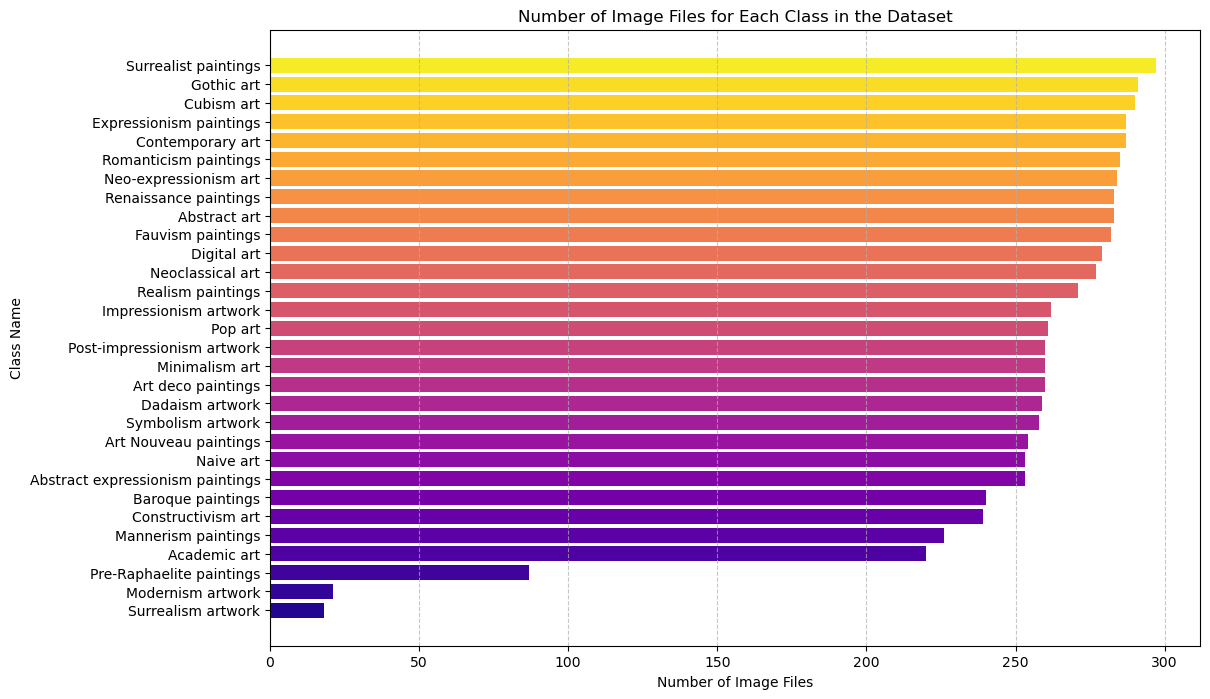

In [18]:
# Urutkan kelas berdasarkan jumlah file
sorted_class_counts = sorted(
    class_file_count.items(), key=lambda x: x[1], reverse=False)
sorted_class_names = [item[0] for item in sorted_class_counts]
sorted_file_counts = [item[1] for item in sorted_class_counts]

# Setel palet warna berdasarkan jumlah kelas
palette = sns.color_palette("plasma", len(sorted_class_counts))

# Creating a plot
plt.figure(figsize=(12, 8))
plt.barh(sorted_class_names, sorted_file_counts, color=palette)
plt.xlabel('Number of Image Files')
plt.ylabel('Class Name')
plt.title('Number of Image Files for Each Class in the Dataset')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Displaying the plot
plt.show()

**Displaying Random Images from the Dataset**

This script randomly selects images from the dataset and displays them in a grid layout. It allows you to specify the number of images (`n`) to display and sets the size of the images accordingly.

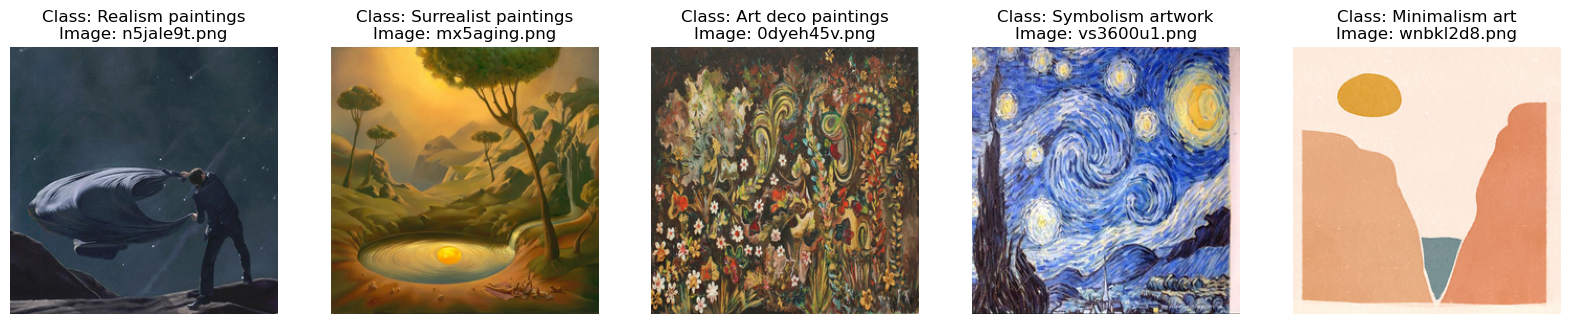

In [19]:
# Jumlah gambar yang ingin ditampilkan
n = 5

# Ukuran gambar
fig, axes = plt.subplots(1, n, figsize=(20, 10))

for i in range(n):
    # Pilih kelas secara acak
    random_class = random.choice(os.listdir(new_dataset_dir))
    class_dir = new_dataset_dir / random_class

    # Pilih gambar secara acak dari kelas yang dipilih
    random_image = random.choice(os.listdir(class_dir))
    random_image_file = class_dir / random_image

    # Baca dan tampilkan gambar
    image = plt.imread(random_image_file)
    axes[i].imshow(image)
    axes[i].set_title("Class: " + random_class +
                      "\n" + "Image: " + random_image)
    axes[i].axis('off')

# plt.savefig('demo.png', transparent=True)
plt.show()